<a href="https://colab.research.google.com/github/corioIA/Projet_IA/blob/main/IA_bat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pwd

'/content'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv('Battery_RUL.csv')

df.head(10)

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107
5,7.0,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106
6,8.0,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105
7,9.0,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104
8,10.0,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103
9,11.0,435251.49,263086.078000,4.267,3.086,269.984000,443700.02,443700.02,1102


In [4]:
df.shape


(15064, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


<Axes: ylabel='Cycle_Index'>

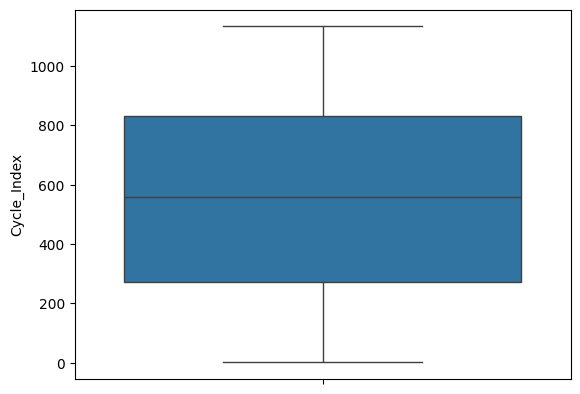

In [19]:
#Analyse descreptive de la variable Cycle_Index
sns.boxplot(data=df, y="Cycle_Index")


<Axes: ylabel='Discharge Time (s)'>

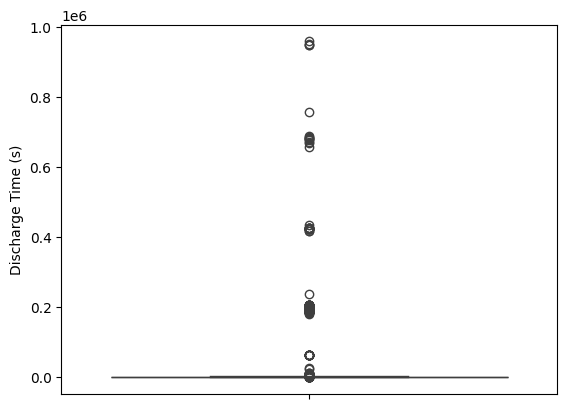

In [8]:
#Analyse descreptive de la variable Discharge Time
sns.boxplot(data=df, y="Discharge Time (s)")

<Axes: ylabel='Decrement 3.6-3.4V (s)'>

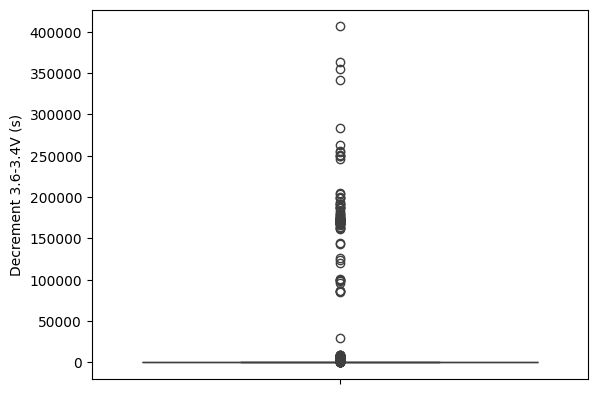

In [29]:
#Analyse descreptive de la variable Decrement 3.6-3.4V
sns.boxplot(data=df, y="Decrement 3.6-3.4V (s)")

In [25]:
#Suppression des valuers abérantes.
df=df[df['Decrement 3.6-3.4V (s)']>=0] # on affecte au dataframe toute les valeur qui n'ont pas de Decrement 3.6-3.4V (s) < 0 ce qui supprime ainsi toute les valeurs negative. Un temps négatif n'existant pas
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15040.000000,15040.000000,15040.000000,15040.000000,15040.000000,15040.000000,15040.000000,15040.000000,15040.00000
mean,556.460372,4264.399383,1441.585842,3.907665,3.578350,3677.173116,5318.677545,9930.541259,553.88996
std,322.336518,31890.413714,13789.835736,0.090069,0.123219,8816.733461,24540.524282,25856.742684,322.39300
min,1.000000,8.690000,31.168831,3.043000,3.022000,-113.584000,5.980000,5.980000,0.00000
25%,272.000000,1168.832500,320.000000,3.846000,3.489000,1828.813679,2564.310000,7840.840000,277.00000
50%,560.000000,1556.190000,439.542857,3.906000,3.574000,2924.343500,3824.230000,8318.795000,550.00000
75%,834.000000,1908.000000,600.000000,3.971000,3.663000,4082.345750,5012.350000,8760.122500,839.00000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.00000


<Axes: ylabel='Max. Voltage Dischar. (V)'>

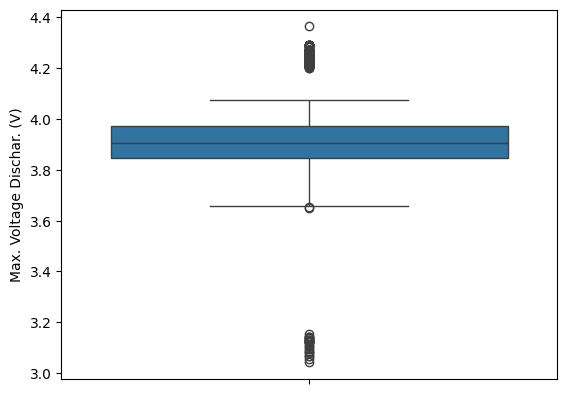

In [10]:
#Analyse descreptive de la variable Max. Voltage Dischar.
sns.boxplot(data=df, y="Max. Voltage Dischar. (V)")

<Axes: ylabel='Min. Voltage Charg. (V)'>

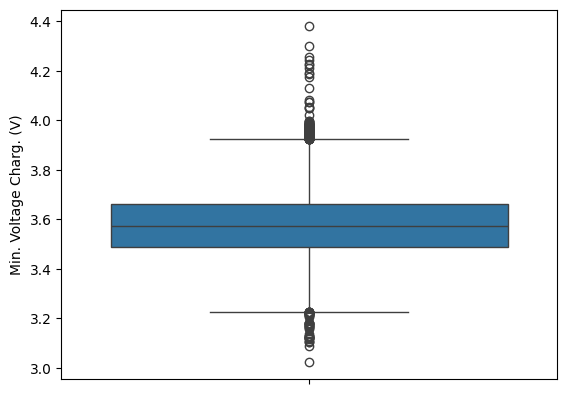

In [11]:
#Analyse descreptive de la variable Min. Voltage Charg.
sns.boxplot(data=df, y="Min. Voltage Charg. (V)")

<Axes: ylabel='Time at 4.15V (s)'>

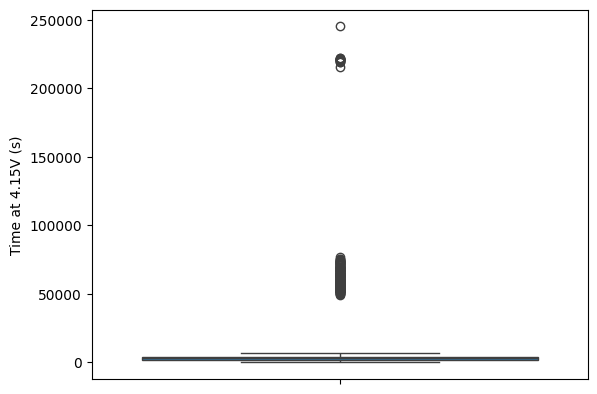

In [12]:
#Analyse descreptive de la variable Time at 4.15V
sns.boxplot(data=df, y="Time at 4.15V (s)")

In [26]:
#Suppression des valeurs abérantes de la colonne Time at 4.15V (s).
df.loc[df['Time at 4.15V (s)']<0]
df=df[df['Time at 4.15V (s)']>=0]
df.describe()


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000,15031.000000
mean,556.501563,4265.676749,1442.170625,3.907649,3.577959,3679.402558,5321.700476,9934.158147,553.849045
std,322.415253,31899.898072,13793.943027,0.090082,0.122206,8818.901831,24547.558775,25864.035804,322.470885
min,1.000000,8.690000,31.168831,3.043000,3.022000,14.052000,5.980000,5.980000,0.000000
25%,271.000000,1168.780000,320.000000,3.846000,3.489000,1828.884429,2564.310000,7842.095000,277.000000
50%,560.000000,1555.940000,439.285714,3.906000,3.574000,2924.359000,3824.250000,8319.690000,550.000000
75%,834.000000,1908.000000,600.000000,3.971000,3.663000,4082.375000,5012.350000,8760.220000,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.300000,245101.117000,880728.100000,880728.100000,1133.000000


<Axes: ylabel='Time constant current (s)'>

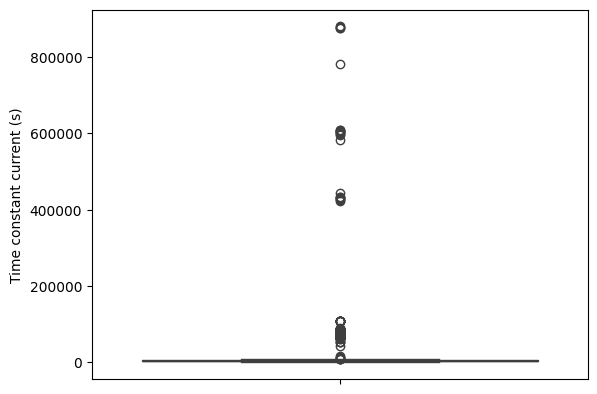

In [13]:
#Analyse descreptive de la variable Time constant current
sns.boxplot(data=df, y="Time constant current (s)")

<Axes: ylabel='Charging time (s)'>

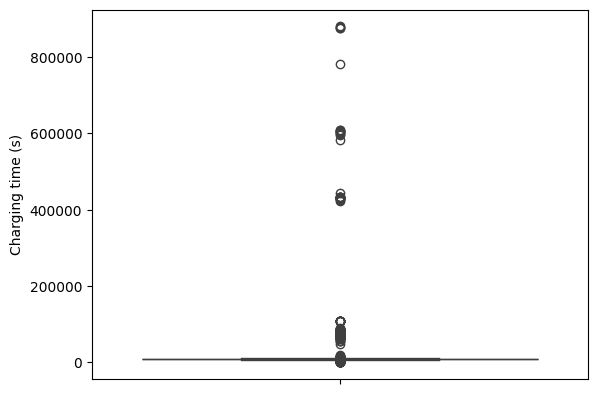

In [14]:
#Analyse descreptive de la variable Charging time
sns.boxplot(data=df, y="Charging time (s)")

<Axes: ylabel='RUL'>

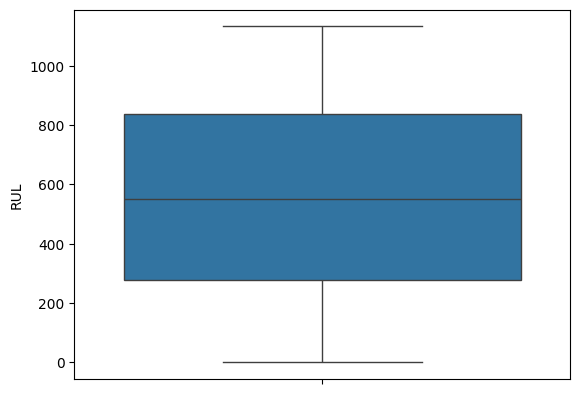

In [16]:
#Analyse descreptive de la variable RUL
sns.boxplot(data=df, y="RUL")

In [17]:
#Recherche de doublon dans le dataSet
df.duplicated().sum() # Il n'y a pas de doublon

0

<Axes: >

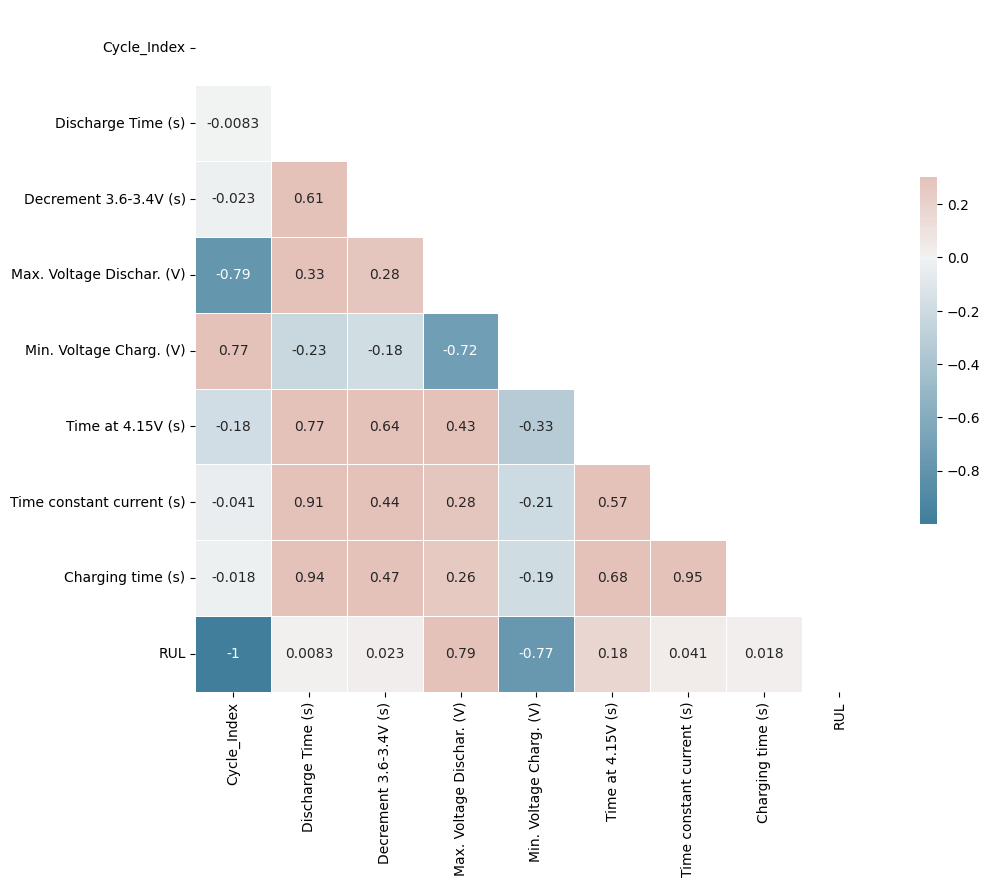

In [28]:
#Matrice de corrélation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})